# 텍스트 마이밍_2
* 온라인 교육사이트(인프런) 새해 이벤트 댓글분석    
* 참조 : https://github.com/corazzon/inflearn-new-year-event-2020

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

%matplotlib inline

In [2]:
df = pd.read_csv("inflearn-event.csv", encoding='euc-kr')
df.shape

(517, 1)

In [3]:
df.head()

,text
0,2020년 목표: 프알못에서 프로젝트 마스터 되기 \n관심 있는 강의 : 스프링 ...
1,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...
2,"2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는..."
3,2020년 목표 : 리액트 공부하기
4,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급


## 1. 데이터 전처리

### 중복데이터 제거

In [4]:
print(df.shape)
df = df.drop_duplicates(['text'], keep='last')
print(df.shape)

(517, 1)
(512, 1)


### 원본은 따로 보존    
* 전처리 전에 원본을 보존하기 위해 복사함

In [5]:
df['origin_text'] = df['text']
df.head()

,text,origin_text
0,2020년 목표: 프알못에서 프로젝트 마스터 되기 \n관심 있는 강의 : 스프링 ...,2020년 목표: 프알못에서 프로젝트 마스터 되기 \n관심 있는 강의 : 스프링 ...
1,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...
2,"2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는...","2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는..."
4,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급
5,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!


### 소문자로 변환    

In [6]:
# 파이썬은 대소문자를 구분하기 때문에 데이터 필터링을 위해 대문자를 모두 소문자로 변경
df['text'] = df['text'].str.lower()

In [7]:
# 같은 의미의 단어를 하나로 통일(예, python -> 파이썬)
df["text"] = df["text"].str.replace(
    "python", "파이썬").str.replace(
    "pandas", "판다스").str.replace(
    "javascript", "자바스크립트").str.replace(
    "java", "자바").str.replace(
    "react", "리액트")

### 텍스트로 관심 강의 분리

In [8]:
df['course'] = df['text'].apply(lambda x: x.split("관심강의")[-1])
df['course'] = df['course'].apply(lambda x: x.split("관심 강의")[-1])
df['course'] = df['course'].apply(lambda x: x.split("관심 강좌")[-1])
df['course'] = df['course'].apply(lambda x: x.split("관심있는 강의")[-1])
df['course'] = df['course'].apply(lambda x: x.split("관심 있는 강의")[-1])
df['course'] = df['course'].str.replace(':', '')
df['course'].head(10)

0                                          스프링 , 리액트
1                                          스프링 웹 mvc
2                                            따배씨 c++
4                40대 프로그래밍 시작!  우리를 위한 프로그래밍  파이썬 중급
5                     2020년 목표  돌머리 비전공자가 멋진 전공자 되기!
6                   2020 년목표 비전공자(경영)가 전공자(it) 되기!!!
7                       2020년 목표  리액트 공부하기, 스프링 공부하기
8                              리액트로 nodebird sns 만들기
9                                                리액트
10      open cv ,  dl(tensorflow, keras, etc. ), nlp
Name: course, dtype: object

In [9]:
df['course'].tail()

512                           더 자바, 애플리케이션을 테스트하는 다양한 방법
513    자바에 대해 조금 더 자세히 공부해보고 싶네요.\n더 자바, 코드를 조작하는 다양한...
514                          2020년에는 네이티브 앱 개발자가 되고 싶어요!
515                           2020년에는 vue를 스터디해서 적용해보자!!
516                              화이팅 하는 한 해\n# 데이터 분석 관련
Name: course, dtype: object

### 띄어쓰기를 제거한 텍스트에서 키워드 추출

In [10]:
search_keyword = ['머신러닝','딥러닝','파이썬','판다스','공공데이터',
                 'django','크롤링','시각화','데이터분석',
                 '웹개발','엑셀','c','자바','자바스크립트',
                 'node','vue','리엑트']
for keyword in search_keyword:
    df[keyword] = df['course'].str.contains(keyword)

In [11]:
df_python = df[df['text'].str.contains('파이썬|공공데이터|판다스')].copy()
df_python.head()

,text,origin_text,course,머신러닝,딥러닝,파이썬,판다스,공공데이터,django,크롤링,시각화,데이터분석,웹개발,엑셀,c,자바,자바스크립트,node,vue,리엑트
4,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! 우리를 위한 프로그래밍 파이썬 중급,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19,파이썬 데이터시각화 분석 실전 프로젝트 수강하고 싶어요,파이썬 데이터시각화 분석 실전 프로젝트 수강하고 싶어요,파이썬 데이터시각화 분석 실전 프로젝트 수강하고 싶어요,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
22,머신러닝 제대로 배워보고 싶습니다.\n#관심강의 : 파이썬 머신러닝 완벽가이드,머신러닝 제대로 배워보고 싶습니다.\n#관심강의 : 파이썬 머신러닝 완벽가이드,파이썬 머신러닝 완벽가이드,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
26,"#관심강의: 프로그래밍 시작하기 : 파이썬 입문, 공공데이터로 파이썬 데이터 분석 ...","#관심강의: 프로그래밍 시작하기 : 파이썬 입문, 공공데이터로 파이썬 데이터 분석 ...","프로그래밍 시작하기 파이썬 입문, 공공데이터로 파이썬 데이터 분석 시작하기\n파...",False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
30,자바기반 웹 개발자입니다. 데이터 분석에 많이 쓰이는 파이썬이 궁금합니다.\n#관심...,자바기반 웹 개발자입니다. 데이터 분석에 많이 쓰이는 Python이 궁금합니다.\n...,"프로그래밍 시작하기 파이썬 입문, 공공데이터로 파이썬 데이터 분석 시작하기",False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df[search_keyword].sum().sort_values(ascending=False)

c         96
파이썬       89
자바        77
vue       34
자바스크립트    29
머신러닝      22
node      22
크롤링       16
딥러닝        8
시각화        7
공공데이터      6
웹개발        5
django     3
리엑트        1
엑셀         1
데이터분석      1
판다스        0
dtype: int64

In [13]:
text = df.loc[(df['공공데이터']==True), 'text']
for t in text:
    print('-'*20)
    print(t)

--------------------
#관심강의: 프로그래밍 시작하기 : 파이썬 입문, 공공데이터로 파이썬 데이터 분석 시작하기
파이썬의 고수가 되고싶어요
--------------------
자바기반 웹 개발자입니다. 데이터 분석에 많이 쓰이는 파이썬이 궁금합니다.
#관심강의: 프로그래밍 시작하기 : 파이썬 입문, 공공데이터로 파이썬 데이터 분석 시작하기
--------------------
올해 안에 원하는 공부 다 끝내보려고요. 내년이면 수능이라..

#관심강의: 공공데이터로 파이썬 데이터 분석 시작하기
--------------------
it개발자입니다. 개발을 오래 안하고 관리만 했더니 다시 개발이 너무 하고싶습니다. 올해는 인프런을 통해서 개발쪽 스킬셋을 업그레이드 하고 싶습니다!
#관심강의: 공공데이터로 파이썬 데이터 분석 시작하기
--------------------
파이썬 데이터분석 마스터
#관심강의:공공데이터로 파이썬 데이터 분석 시작하기
--------------------
올해 졸업하는 컴퓨터공학과 학생입니다!
백엔드 혹은 데이터 엔지니어 쪽으로 취업하고 싶습니다!
#관심강의: 공공데이터로 파이썬 데이터 분석 시작하기


### 빈도수 계산을 위한 텍스트 데이터 벡터화    
* BOW 단어 가방에 단어를 토큰화해서 담아줌

In [14]:
# 토큰화
"파이썬 데이터 분석".split()

['파이썬', '데이터', '분석']

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = 'word', # 캐릭터 단위로 벡터화 가능
                            tokenizer = None, # 토크나이저를 따로 지정
                            preprocessor = None, # 전처리 도구
                            stop_words = None, # 불용어
                            min_df = 2, # 토큰이 나타날 최소 문서 개수로 오타나 빈도수 작은 특수용어 제거
                            ngram_range = (3,6), # BOW단위 갯수의 범위 지정
                            max_features = 2000 # 만들 피쳐의 수, 단어의 수
                            )
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=2000, min_df=2,
                ngram_range=(3, 6), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [16]:
feature_vector = vectorizer.fit_transform(df['course'])
feature_vector.shape

(512, 577)

In [17]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

577


['2020년 공부 목표',
 '2020년 목표 리액트',
 '2020년 목표 리액트 공부하기',
 '3dsmax 초급부터 전문가까지',
 '3dsmax 초급부터 전문가까지 한방에',
 '3dsmax 초급부터 전문가까지 한방에 끝내는',
 'age of vue',
 'age of vue js',
 'age of vue js vue',
 'age of vue js vue js']

In [18]:
# 각 리뷰마다 등장하는 단어에 빈도수가 표현
pd.DataFrame(feature_vector[:10].toarray(), columns=vocab).head()

,2020년 공부 목표,2020년 목표 리액트,2020년 목표 리액트 공부하기,3dsmax 초급부터 전문가까지,3dsmax 초급부터 전문가까지 한방에,3dsmax 초급부터 전문가까지 한방에 끝내는,age of vue,age of vue js,age of vue js vue,age of vue js vue js,...,활용1 애플리케이션 개발,활용1 애플리케이션 개발 실전,활용1 애플리케이션 개발 실전 스프링,활용1 애플리케이션 개발 실전 스프링 부트와,활용2 api 개발과,활용2 api 개발과 성능,활용2 api 개발과 성능 최적화,활용한 다양한 자동화,활용한 다양한 자동화 어플리케이션,활용한 다양한 자동화 어플리케이션 제작하기
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# 위에서 구한 단어벡터를 더하면 단어가 전체에서 등장하는 횟수를 알 수 있다.
# 벡터화된 피처를 확인해 봄
# Bag of words에 몇 개의 단어가 들어있는지 확인
dist = np.sum(feature_vector, axis=0)

df_freq = pd.DataFrame(dist, columns=vocab)
df_freq

,2020년 공부 목표,2020년 목표 리액트,2020년 목표 리액트 공부하기,3dsmax 초급부터 전문가까지,3dsmax 초급부터 전문가까지 한방에,3dsmax 초급부터 전문가까지 한방에 끝내는,age of vue,age of vue js,age of vue js vue,age of vue js vue js,...,활용1 애플리케이션 개발,활용1 애플리케이션 개발 실전,활용1 애플리케이션 개발 실전 스프링,활용1 애플리케이션 개발 실전 스프링 부트와,활용2 api 개발과,활용2 api 개발과 성능,활용2 api 개발과 성능 최적화,활용한 다양한 자동화,활용한 다양한 자동화 어플리케이션,활용한 다양한 자동화 어플리케이션 제작하기
0,3,2,2,2,2,2,5,5,2,2,...,6,3,2,2,7,7,7,6,6,6


In [20]:
# 행과 열을 전치시키고 빈도수로 정렬
df_freq.T.sort_values(by=0, ascending=False).head(10)

,0
홍정모의 따라하며 배우는,28
nodebird sns 만들기,16
스프링 데이터 jpa,14
프로그래밍과 자바스크립트 es6,13
리액트로 nodebird sns,12
리액트로 nodebird sns 만들기,12
함수형 프로그래밍과 자바스크립트 es6,12
함수형 프로그래밍과 자바스크립트,12
실전 스프링 부트와 jpa,11
실전 스프링 부트와,11


### TF-IDF로 가중치를 주어 벡터화
#### TfidfTransformer()
* norm='l2' 각 문서의 피처 벡터를 어떻게 벡터 정규화할지 결정
    * L2 : 벡터의 각 원소의 제곱의 합이 1이 되도록 만드는 것, 유클리디안 거리
    * L1 : 벡터의 각 원소의 절대값의 합이 1이 되도록 크기를 조절, 맨하탄 거리
* smooth_idf = False
    * 피처를 만들 때 0으로 나오는 항목에 대해 작은 값을 더해서(스무딩해서)피처를 만들지를 결정
* sublinear_tf = False
* use_idf = True
    * TF-IDF를 사용해 피처를 만들 것인지 아니면 단어 빈도 자체를 사용할 것인지 여부 결정

In [21]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
transformer

TfidfTransformer(norm='l2', smooth_idf=False, sublinear_tf=False, use_idf=True)

In [22]:
feature_tfidf = transformer.fit_transform(feature_vector)
feature_tfidf.shape

(512, 577)

In [23]:
feature_tfidf

<512x577 sparse matrix of type '<class 'numpy.float64'>'
	with 2216 stored elements in Compressed Sparse Row format>

In [24]:
# 각 row에서 전체 단어가방에 있는 어휘에서 등장하는 단어에 대한 one-hot-vector에 TF-IDF 가중치 반영
tfidf_freq = pd.DataFrame(feature_tfidf.toarray(), columns=vocab)
tfidf_freq.head()

,2020년 공부 목표,2020년 목표 리액트,2020년 목표 리액트 공부하기,3dsmax 초급부터 전문가까지,3dsmax 초급부터 전문가까지 한방에,3dsmax 초급부터 전문가까지 한방에 끝내는,age of vue,age of vue js,age of vue js vue,age of vue js vue js,...,활용1 애플리케이션 개발,활용1 애플리케이션 개발 실전,활용1 애플리케이션 개발 실전 스프링,활용1 애플리케이션 개발 실전 스프링 부트와,활용2 api 개발과,활용2 api 개발과 성능,활용2 api 개발과 성능 최적화,활용한 다양한 자동화,활용한 다양한 자동화 어플리케이션,활용한 다양한 자동화 어플리케이션 제작하기
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df_tfidf = pd.DataFrame(tfidf_freq.sum())
df_tfidf_top = df_tfidf.sort_values(by=0, ascending=False)
df_tfidf_top.head()

,0
홍정모의 따라하며 배우는,22.762628
nodebird sns 만들기,8.185596
스프링 데이터 jpa,7.663637
리액트로 nodebird sns 만들기,7.067853
리액트로 nodebird sns,7.067853


In [26]:
# 중간에 생략되는 단어를 자세히 보고자 할 때
for t in df_tfidf_top.index[:50]:
    print(t)

홍정모의 따라하며 배우는
nodebird sns 만들기
스프링 데이터 jpa
리액트로 nodebird sns 만들기
리액트로 nodebird sns
프로그래밍과 자바스크립트 es6
함수형 프로그래밍과 자바스크립트
함수형 프로그래밍과 자바스크립트 es6
부트 개념과 활용
스프링 부트 개념과
스프링 부트 개념과 활용
홍정모의 따라하며 배우는 c언어
따라하며 배우는 c언어
파이썬 알고리즘 문제풀이
웹게임을 만들며 배우는
orm 표준 jpa
표준 jpa 프로그래밍
orm 표준 jpa 프로그래밍
자바 orm 표준
자바 orm 표준 jpa
자바 orm 표준 jpa 프로그래밍
스프링부트 개념과 활용
파이썬입문과 크롤링기초 부트캠프
파이썬 데이터 분석
홍정모의 따라하면서 배우는
조작하는 다양한 방법
코드를 조작하는 다양한 방법
코드를 조작하는 다양한
애플리케이션을 테스트하는 다양한
자바 애플리케이션을 테스트하는 다양한
자바 애플리케이션을 테스트하는 다양한 방법
테스트하는 다양한 방법
자바 애플리케이션을 테스트하는
애플리케이션을 테스트하는 다양한 방법
node js로 크롤링하기
만들며 배우는 typescript
웹게임을 만들며 배우는 typescript
실전 스프링 데이터 jpa
실전 스프링 데이터
머신러닝 완벽 가이드
파이썬 머신러닝 완벽 가이드
파이썬 머신러닝 완벽
rest api 개발
스프링 기반 rest
스프링 기반 rest api 개발
스프링 기반 rest api
기반 rest api
기반 rest api 개발
남박사의 파이썬 실전
실전 100 활용


### 군집화

In [27]:
from sklearn.cluster import KMeans
from tqdm import trange
inertia = []

start = 10
end = 50

# 적절한 클러스터의 갯수를 알기 위해 inertia 값을 구함
for i in trange(start, end):
    cls = KMeans(n_clusters=i, random_state=42)
    cls.fit(feature_vector)
    inertia.append(cls.inertia_)

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:31<00:00,  1.28it/s]


Text(0.5, 1.0, 'KMeans 클러스터 수 비교')

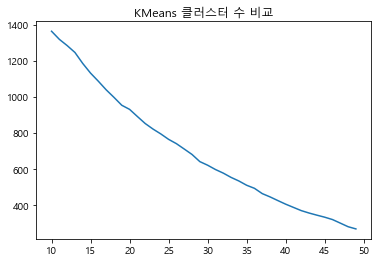

In [28]:
plt.plot(range(start, end), inertia)
plt.title('KMeans 클러스터 수 비교')

In [33]:
n_clusters = 30
cls = KMeans(n_clusters=n_clusters, random_state=42)
cls.fit(feature_vector)
predict=cls.predict(feature_vector)
df['cluster'] = predict

In [34]:
df['cluster'].value_counts().head(10)

0     366
23     27
17     12
19     11
6      10
22      9
2       8
7       6
1       5
26      5
Name: cluster, dtype: int64

In [36]:
# batch_size를 쓸 수 있는 MiniBatchKMeans로 군집화
from sklearn.cluster import MiniBatchKMeans
b_inertia = []

# 적절한 클러스터의 갯수를 알기 위해 inertia 값을 구함
for i in trange(start, end):
    cls=MiniBatchKMeans(n_clusters=i, random_state=42)
    cls.fit(feature_vector)
    b_inertia.append(cls.inertia_)

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:03<00:00, 11.31it/s]


Text(0.5, 1.0, 'MiniBatchKMeans 클러스터 수 비교')

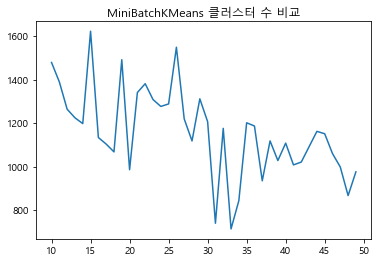

In [37]:
plt.plot(range(start, end), b_inertia)
plt.title("MiniBatchKMeans 클러스터 수 비교")

In [38]:
cls = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
cls.fit(feature_vector)
predict=cls.predict(feature_vector)
df['bcluster'] = predict

In [41]:
df['bcluster'].value_counts().head(10)

7     262
1     102
27     27
17     12
28     11
2      10
11      9
3       8
24      7
15      7
Name: bcluster, dtype: int64

In [44]:
df[df['bcluster']==27].head(5)

,text,origin_text,course,머신러닝,딥러닝,파이썬,판다스,공공데이터,django,크롤링,...,웹개발,엑셀,c,자바,자바스크립트,node,vue,리엑트,cluster,bcluster
29,메카트로닉스공학과를 나와 이제 취직을 준비하는 취준생입니다. \n 취직을 준비하면서...,메카트로닉스공학과를 나와 이제 취직을 준비하는 취준생입니다. \n 취직을 준비하면서...,1. 홍정모의 따라하며 배우는 c++\n ...,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,23,27
41,c++ 공부!\n#관심강의 : 홍정모의 따라하며 배우는 c++,c++ 공부!\n#관심강의 : 홍정모의 따라하며 배우는 C++,홍정모의 따라하며 배우는 c++,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,23,27
68,c++ 기초부터 다시잡고 고부하고 싶습니다.\n\n#관심강의 : 홍정모의 따라하며 ...,C++ 기초부터 다시잡고 고부하고 싶습니다.\n\n#관심강의 : 홍정모의 따라하며 ...,홍정모의 따라하며 배우는 c++,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,23,27
78,다가오는 학기부터 컴퓨터공학 연계전공을 하게되었습니다. 기초가 많이 부족하기에 차근...,다가오는 학기부터 컴퓨터공학 연계전공을 하게되었습니다. 기초가 많이 부족하기에 차근...,홍정모의 따라하며 배우는 c언어,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,23,27
127,c++ 기초부터 다져나가고 싶습니다.\n#관심강의 : 홍정모의 따라하며 배우는 c++,C++ 기초부터 다져나가고 싶습니다.\n#관심강의 : 홍정모의 따라하며 배우는 C++,홍정모의 따라하며 배우는 c++,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,23,27


In [52]:
# KMeans와 MiniBatchKMeans와 동일하게 클러스터링이 되었는지 확인
df.loc[df['bcluster']==24, ['bcluster', 'cluster', 'course']].head(10)

,bcluster,cluster,course
18,24,0,"자바 공부 마스터 하고 싶습니다. 더 자바, 코드를 조작하는 다양한 방법"
276,24,0,"더 자바, 코드를 조작하는 다양한 방법"
315,24,0,안녕하십니까!\n작년 9월에 자바웹개발자로 입사를 하고 부족함을 많이 느끼는 신입개...
329,24,0,"더 자바, 코드를 조작하는 다양한 방법"
368,24,8,"더 자바, 코드를 조작하는 다양한 방법, 스프링 데이터 jpa, 스프링 프레임워..."
388,24,16,"더 자바, 코드를 조작하는 다양한 방법, 스프링 데이터 jpa, 스프링 프레임..."
513,24,0,"자바에 대해 조금 더 자세히 공부해보고 싶네요.\n더 자바, 코드를 조작하는 다양한..."
